### EDA & Visualization

In [1]:
%pwd

'c:\\Arjun_Works\\SalesNexus\\research'

In [2]:
import os 
os.chdir('../')
%pwd

'c:\\Arjun_Works\\SalesNexus'

In [3]:
import pandas as pd

try:
  train_df = pd.read_csv("artifacts/data_preprocessing/train_merged.csv")
  test_df = pd.read_csv("artifacts/data_preprocessing/test_merged.csv")

except FileNotFoundError:
  print("Files not found. Please ensure the data files are in the correct directory.")

C:\Users\phoen\AppData\Local\Temp\ipykernel_26860\2661553361.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("artifacts/data_preprocessing/train_merged.csv")


In [4]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday


In [5]:
test_df.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,46.8,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,46.8,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,NaN,46.8,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,NaN,46.8,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,NaN,46.8,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013362 entries, 0 to 3013361
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type_x        object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  type_y        object 
dtypes: float64(3), int64(4), object(6)
memory usage: 298.9+ MB


In [7]:
train_target = train_df['sales']
train_df.drop(columns=['sales'], inplace=True)

In [8]:
train_corr_df = train_df.copy()
train_corr_df['sales'] = train_target

corr = train_corr_df.corr(numeric_only=True)

corr['sales'].sort_values(ascending=False)

sales           1.000000
onpromotion     0.427553
transactions    0.214664
id              0.085615
store_nbr       0.041127
cluster         0.038467
dcoilwtico     -0.074897
Name: sales, dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

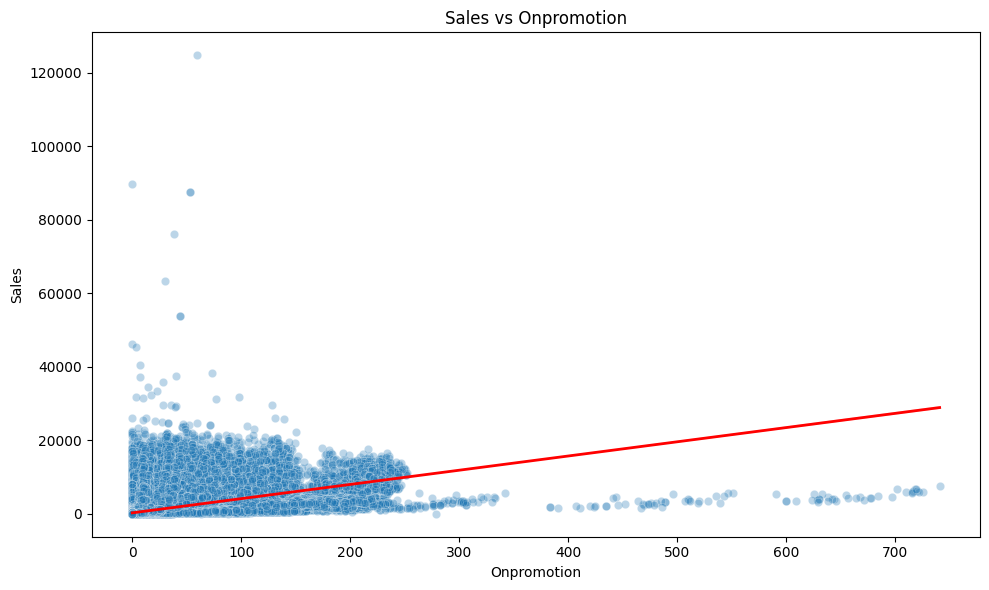

In [10]:
# Sales vs Onpromotion

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_corr_df, x='onpromotion', y='sales', alpha=0.3)
sns.regplot(data=train_corr_df, x='onpromotion', y='sales', scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Sales vs Onpromotion')
plt.xlabel('Onpromotion')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

<p> So we can observe that, Even though higher onpromotion numbers imply more units promoted, optimal sales are achieved when promotional quantity is moderate or low  possibly indicating that quality of promotion (and aligning with demand) is more impactful than sheer quantity. </p>

<h5>Now Let's see which Family has high sales </h5>

In [11]:
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [12]:
train_df

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y
0,0,2013-01-01,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
1,1,2013-01-01,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
2,2,2013-01-01,1,BEAUTY,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
3,3,2013-01-01,1,BEVERAGES,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
4,4,2013-01-01,1,BOOKS,0,Quito,Pichincha,D,13,NaN,NaN,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
3013357,3000883,2017-08-15,9,POULTRY,0,Quito,Pichincha,B,6,2155.0,47.57,Holiday
3013358,3000884,2017-08-15,9,PREPARED FOODS,1,Quito,Pichincha,B,6,2155.0,47.57,Holiday
3013359,3000885,2017-08-15,9,PRODUCE,148,Quito,Pichincha,B,6,2155.0,47.57,Holiday
3013360,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8,Quito,Pichincha,B,6,2155.0,47.57,Holiday


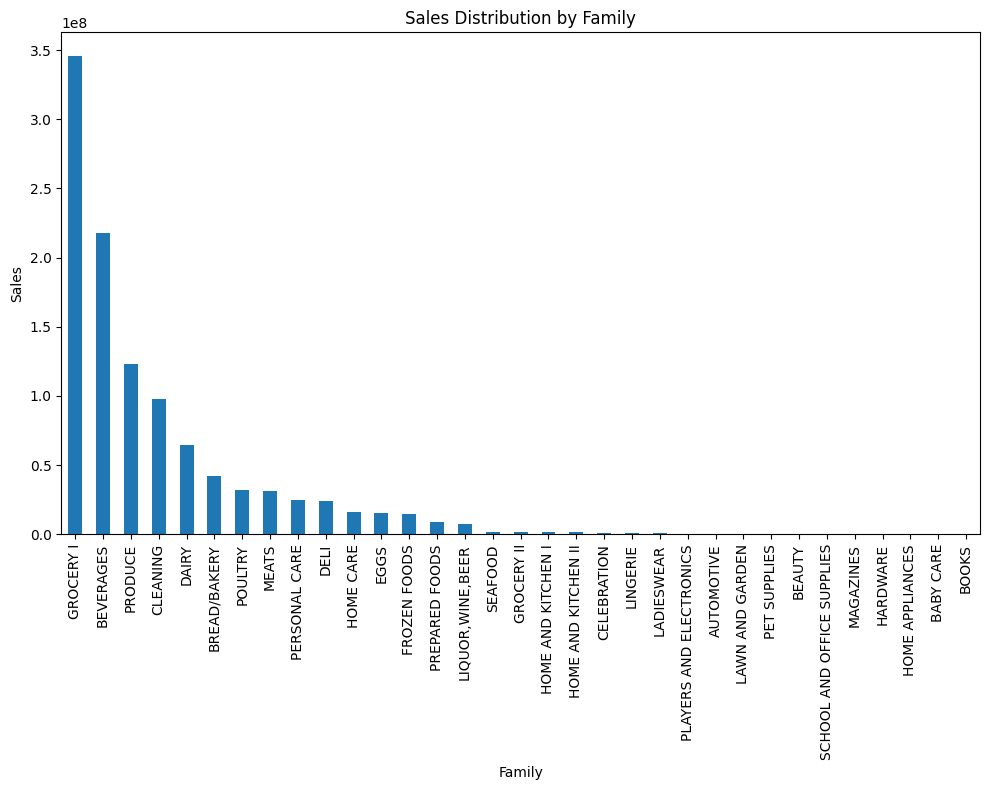

In [13]:
# Sales Distribution by Family 

family_sales = train_corr_df.groupby('family')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
family_sales.plot(kind='bar', colormap='tab20')
plt.ylabel('Sales')
plt.xlabel('Family')
plt.title('Sales Distribution by Family')
plt.tight_layout()
plt.show()

<p>Most sales come from daily use and household-related families  like Grocery, Beverages, Produce, and Cleaning  indicating that essential products dominate sales compared to niche or specialty items. </p>

<h5>Now Let's see which city has high sales </h5>

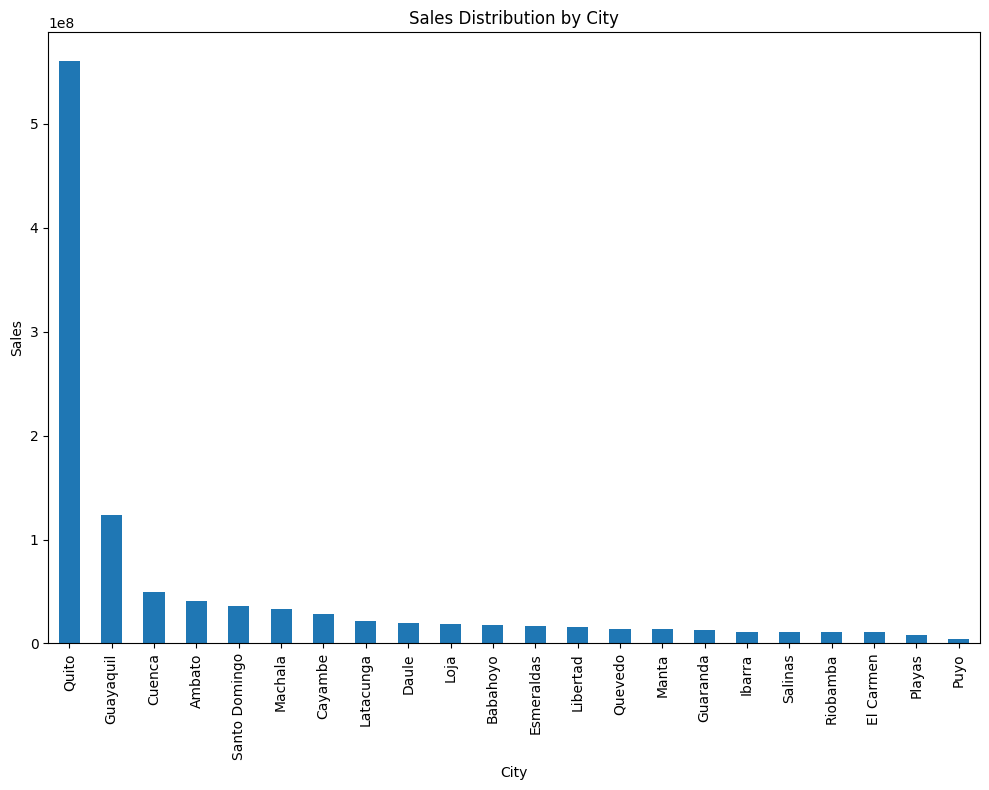

In [14]:
# Sales Distribution by City

family_sales = train_corr_df.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
family_sales.plot(kind='bar', colormap='tab20')
plt.ylabel('Sales')
plt.xlabel('City')
plt.title('Sales Distribution by City')
plt.tight_layout()
plt.show()

<p>Quito dominates sales by a huge margin, indicating it's the primary revenue engine for the business. Other cities like Guayaquil, Cuenca, and Ambato have noticeable sales but are nowhere near Quito’s scale suggesting a highly centralized sales trend. </p>

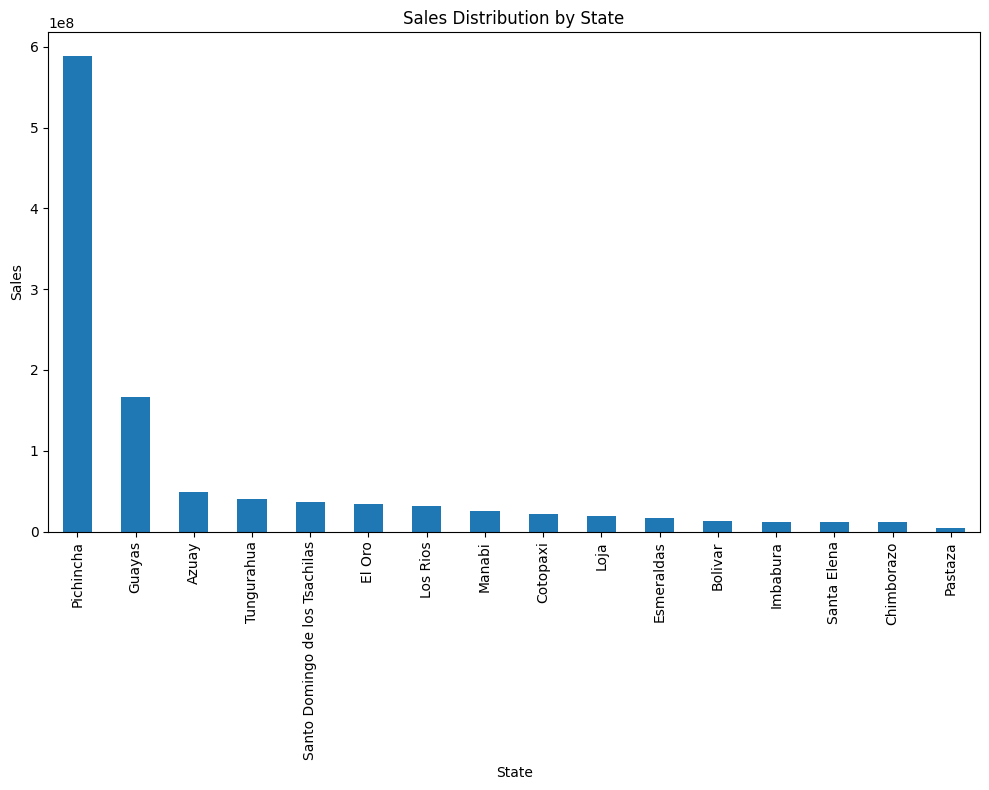

In [15]:
# Sales Distribution by State

family_sales = train_corr_df.groupby('state')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
family_sales.plot(kind='bar', colormap='tab20')
plt.ylabel('Sales')
plt.xlabel('State')
plt.title('Sales Distribution by State')
plt.tight_layout()
plt.show()

<p>Pichincha overwhelmingly leads in sales, making it the powerhouse state for the business, followed by Guayas. All other states have relatively minimal contribution, highlighting a strong geographic sales concentration that can guide targeted marketing and expansion efforts.</p>

In [16]:
train_df['type_x'].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

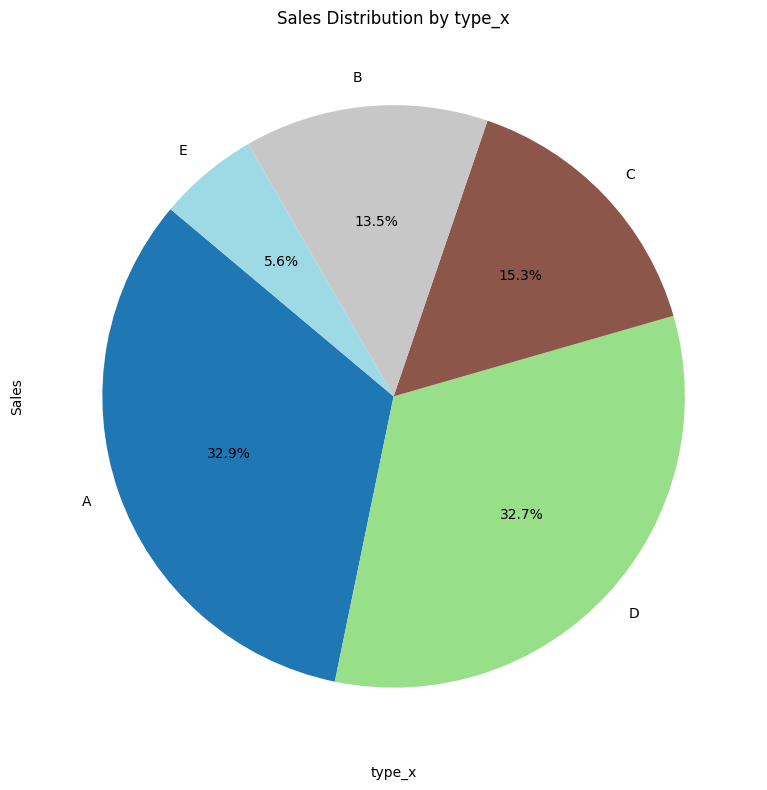

In [17]:
# Sales Distribution by type_x

family_sales = train_corr_df.groupby('type_x')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
family_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.ylabel('Sales')
plt.xlabel('type_x')
plt.title('Sales Distribution by type_x')
plt.tight_layout()
plt.show()

From online research, the `type_x` values (`A, B, C, D, E`) denote **store types**:

- **A**: Specialized or other retail formats 
- **B**: Hypermarkets or warehouse-style stores
- **C**: Large supermarkets  
- **D**: Medium-sized stores
- **E**: Small convenience stores

These labels capture critical differences in store format and customer behavior, making them vital features for accurate sales forecasting.

<p>Now, let’s visualize the correlation between Sales and Transactions to understand their relationship better.</p>

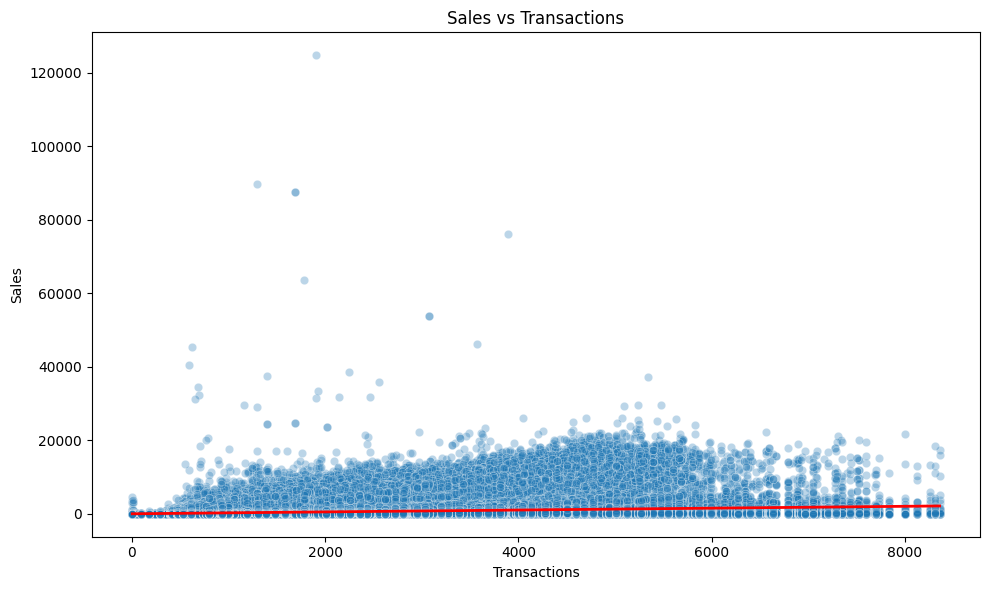

In [18]:
# Sales vs transactions

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_corr_df, x='transactions', y='sales', alpha=0.3)
sns.regplot(data=train_corr_df, x='transactions', y='sales', scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Sales vs Transactions')
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [19]:
train_df['cluster'].unique()

array([13, 15,  6,  7,  3, 12, 16,  9,  1, 10,  8,  2,  4,  5, 11, 14, 17],
      dtype=int64)

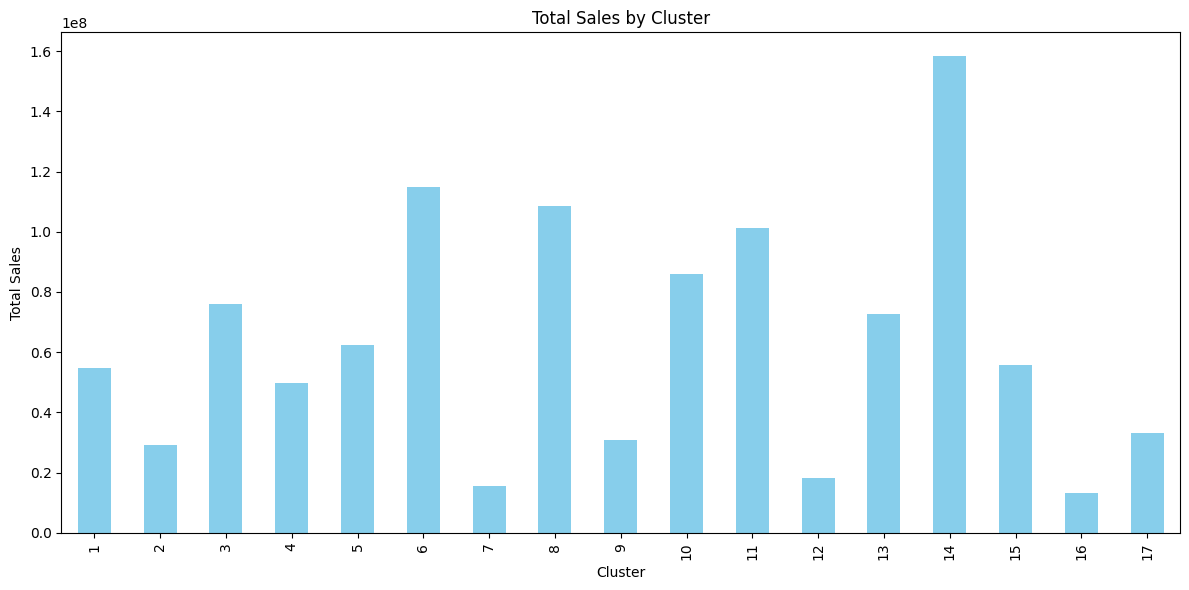

In [20]:
# Sales Distribution by Cluster

cluster_sales = train_corr_df.groupby('cluster')['sales'].sum().sort_index()

plt.figure(figsize=(12, 6))
cluster_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.title('Total Sales by Cluster')
plt.tight_layout()
plt.show()

<p>Cluster 14 clearly dominates with the highest total sales, making it the top-performing segment, while clusters like 7 and 16 have significantly lower sales, highlighting potential areas for targeted improvements or resource optimization.</p>


<h5>We will perform EDA again after completing feature engineering.</h5>

In [21]:
import pandas as pd

try:
  train_df = pd.read_csv("artifacts/features_dataTransformation/train_final.csv")
  test_df = pd.read_csv("artifacts/features_dataTransformation/test_final.csv")
except FileNotFoundError:
  print("Files not found. Please ensure the data files are in the correct directory.")

In [22]:
train_target = train_df['sales']
train_df.drop(columns=['sales'], inplace=True)

In [23]:
train_corr_df = train_df.copy()
train_corr_df['sales'] = train_target

corr = train_corr_df.corr(numeric_only=True)

corr['sales'].sort_values(ascending=False)

sales                     1.000000
family_GROCERY I          0.548015
onpromotion               0.427553
onpromotion_trend         0.377347
family_BEVERAGES          0.324727
                            ...   
family_HOME APPLIANCES   -0.057243
family_BABY CARE         -0.057298
family_BOOKS             -0.057304
dcoilwtico               -0.075061
type_x_C                 -0.090229
Name: sales, Length: 95, dtype: float64

In [24]:
train_corr_df.columns

Index(['id', 'date', 'store_nbr', 'onpromotion', 'cluster', 'transactions',
       'dcoilwtico', 'year', 'day', 'is_weekend', 'day_of_year',
       'is_month_start', 'is_month_end', 'onpromotion_trend', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family

###  Time Series Patterns

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns are prepared
train_corr_df["date"] = pd.to_datetime(train_corr_df["date"])
train_corr_df["day_of_week_name"] = train_corr_df["date"].dt.day_name()
train_corr_df["month_num"] = train_corr_df["date"].dt.month

# Aggregation
daily_sales = train_corr_df.groupby("date")["sales"].sum()
weekly_sales = train_corr_df.groupby("day_of_week_name")["sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
monthly_sales = train_corr_df.groupby("month_num")["sales"].sum()
holiday_sales = train_corr_df.groupby("is_holiday")["sales"].sum()

# Plot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 1. Daily trend
daily_sales.plot(ax=axs[0,0], title="Daily Sales Trend", color="steelblue")
axs[0,0].set_ylabel("Total Sales")

# 2. Weekly trend
weekly_sales.plot(kind="bar", ax=axs[0,1], title="Sales by Day of Week", color="cornflowerblue")
axs[0,1].set_ylabel("Total Sales")

# 3. Monthly trend
monthly_sales.plot(kind="bar", ax=axs[1,0], title="Sales by Month", color="teal")
axs[1,0].set_ylabel("Total Sales")

# 4. Holiday vs Non-Holiday
holiday_sales.plot(kind="bar", ax=axs[1,1], title="Sales: Holiday vs Non-Holiday", color=["gray", "green"])
axs[1,1].set_ylabel("Total Sales")
axs[1,1].set_xticks([0,1])
axs[1,1].set_xticklabels(["Non-Holiday", "Holiday"], rotation=0)

plt.tight_layout()
plt.show()


KeyError: 'is_holiday'

###  Observations

* **Sales trend upward** from 2013–2017, with notable spikes.
* **Weekends dominate sales**, especially Saturday and Sunday.
* **December and July** are the best months for sales.
* **Non‑holidays drive the bulk** of total sales.


### Distribution Analysis

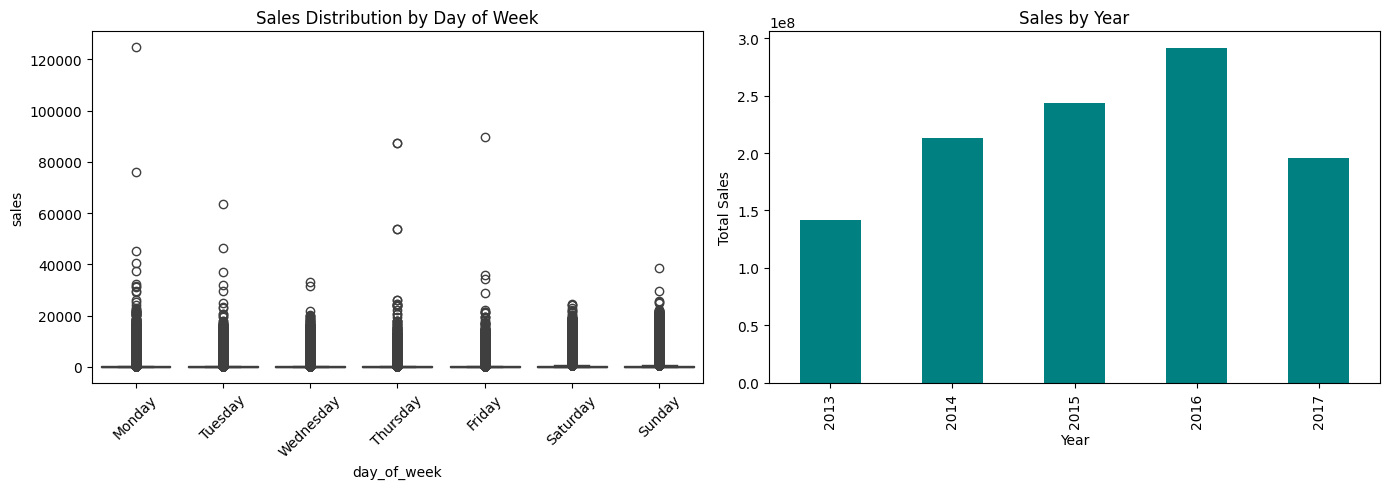

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
train_corr_df["year"] = train_corr_df["date"].dt.year
yearly_sales = train_corr_df.groupby("year")["sales"].sum()

# Create 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 1. Sales Distribution by Day of Week
sns.boxplot(data=train_corr_df,
            x="day_of_week",
            y="sales",
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            ax=axs[0])
axs[0].set_title("Sales Distribution by Day of Week")
axs[0].tick_params(axis='x', rotation=45)

# 2. Yearly Sales
yearly_sales.plot(kind="bar", ax=axs[1], title="Sales by Year", color="teal")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Total Sales")

plt.tight_layout()
plt.show()


###  Observation

* **Sales by Day of Week:**
  Sales are relatively balanced across weekdays, with some outliers showing higher sales, especially on **Thursday** and **Friday**.

* **Sales by Year:**
  Sales show a strong **growth trend from 2013–2016**, peaking in **2016**, followed by a noticeable drop in **2017**.


### Outliers & Zero Sales

Number of Zero Sales instances: 949019


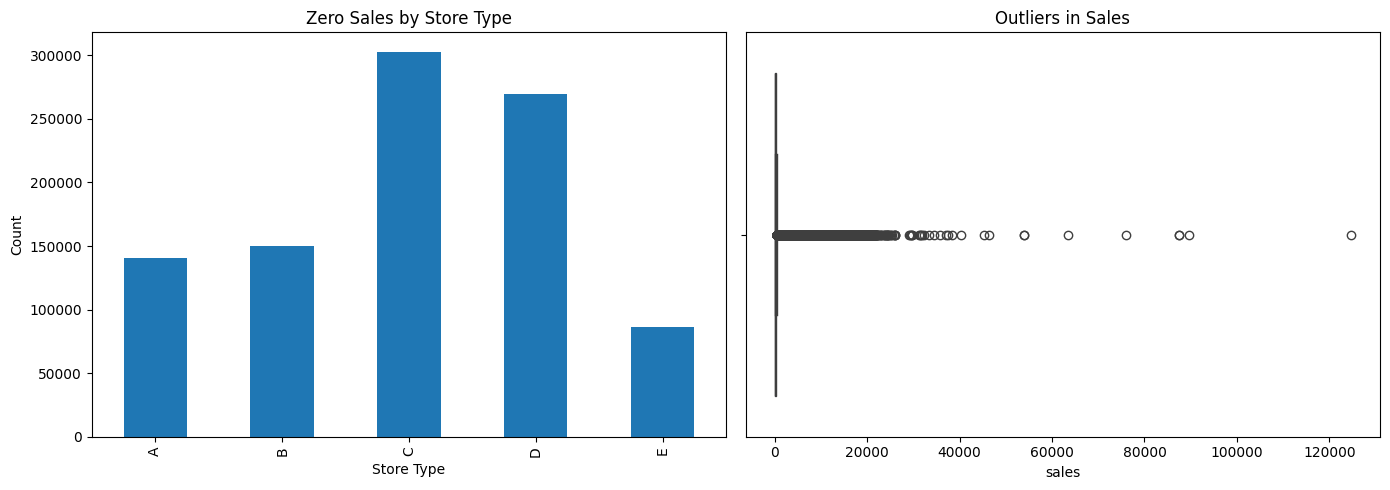

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zero Sales instances
zero_sales_count = (train_corr_df["sales"] == 0).sum()
print(f"Number of Zero Sales instances: {zero_sales_count}")

# Zero Sales across Store Types
type_x_cols = [col for col in train_corr_df.columns if col.startswith("type_x_")]
def get_store_type(row):
	for col in type_x_cols:
		if row[col] == 1:
			return col.replace("type_x_", "")
	return "A"

zero_sales_df = train_corr_df[train_corr_df["sales"] == 0].copy()
zero_sales_df["store_type"] = zero_sales_df.apply(get_store_type, axis=1)
zero_by_type = zero_sales_df.groupby("store_type")["sales"].count()

# Create 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Zero Sales by Store Type
zero_by_type.plot(kind="bar", ax=axes[0], title="Zero Sales by Store Type")
axes[0].set_xlabel("Store Type")
axes[0].set_ylabel("Count")

# Plot Outliers in Sales
sns.boxplot(data=train_corr_df, x="sales", ax=axes[1])
axes[1].set_title("Outliers in Sales")

plt.tight_layout()
plt.show()

**Observations:**

* Most zero sales occur in Store Types **C** and **D**, suggesting possible operational downtime or category gaps.
* The sales data has significant outliers, indicating highly variable sales instances that may require special consideration when modeling.


### Feature Interaction Analysis

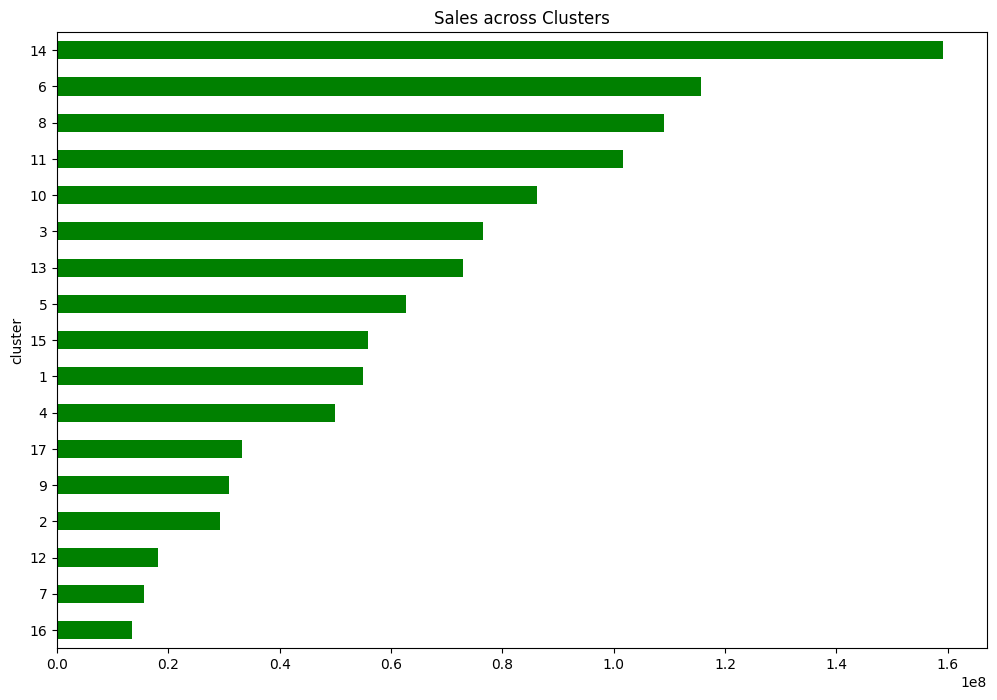

In [ ]:
sales_family_cluster = train_corr_df.groupby(["cluster"])["sales"].sum().sort_values()
sales_family_cluster.plot(kind="barh", figsize=(12,8), title="Sales across Clusters", color="green");
plt.show()


**Observation:**

* Cluster **14** dominates sales significantly, making it the top-performing segment.
* Clusters **6, 8, and 11** also contribute substantially, while clusters **16** and **7** trail far behind.


In [ ]:
import plotly.express as px

sales_by_state_holiday = train_corr_df.groupby(["state_Chimborazo", "is_holiday"])["sales"].sum().reset_index()
px.bar(sales_by_state_holiday, x="state_Chimborazo", y="sales", color="is_holiday",
       title="Sales by State and Holiday Status").show()


### Expanded Correlation Matrix

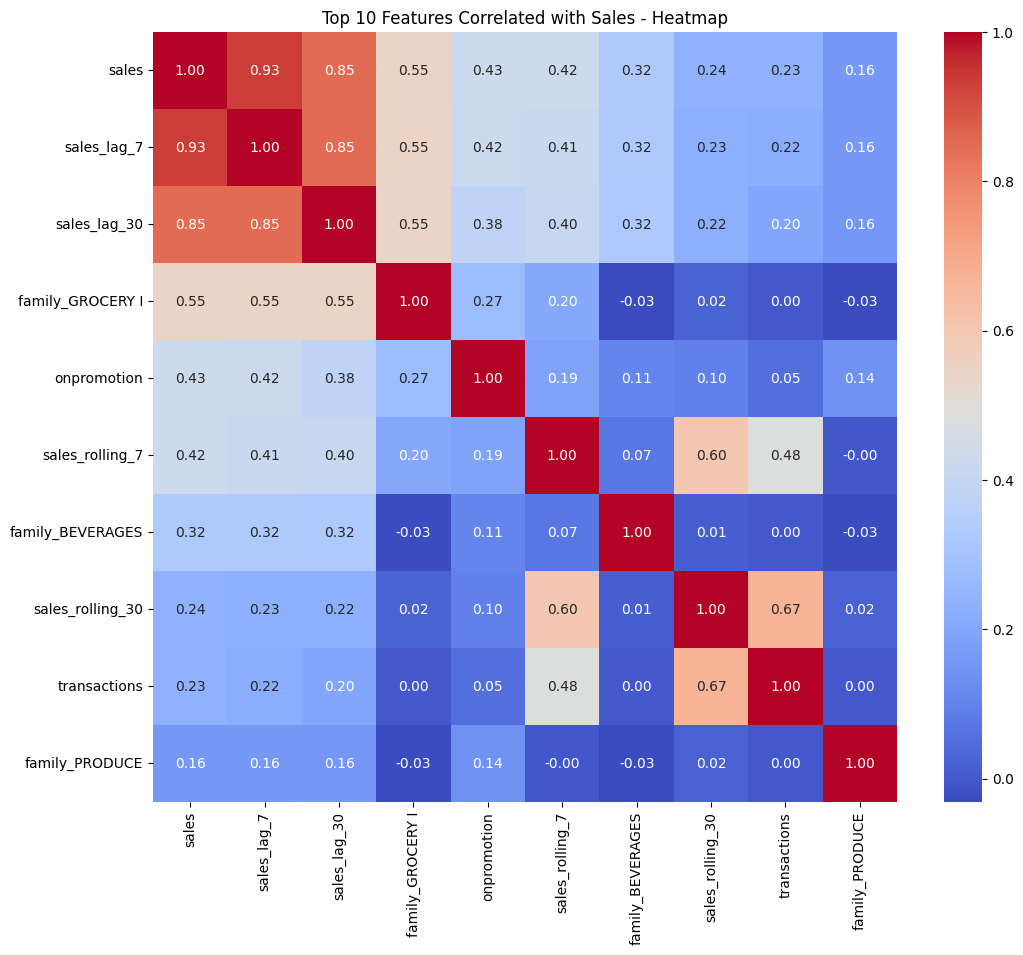

In [ ]:
# Identify top 10 features correlated with sales
top_10_features = train_corr_df.corr(numeric_only=True)['sales'].abs().sort_values(ascending=False).head(10).index
top_10_corr = train_corr_df[top_10_features].corr()

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(top_10_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Features Correlated with Sales - Heatmap")
plt.show()

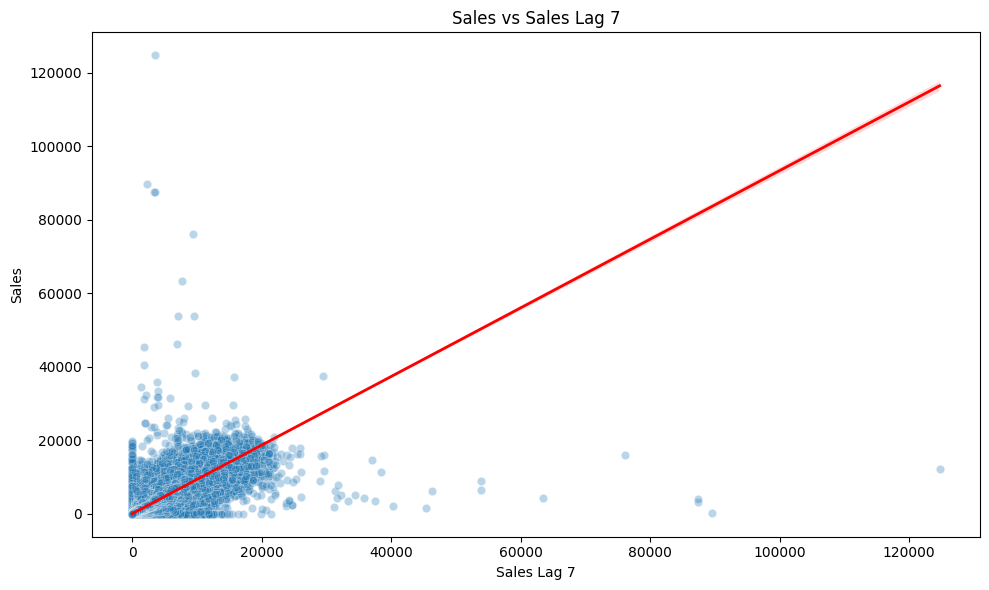

Correlation between sales_lag_7 and sales: 0.932


In [ ]:
# Analyze the relationship between sales_lag_7 and sales

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_corr_df, x='sales_lag_7', y='sales', alpha=0.3)
sns.regplot(data=train_corr_df, x='sales_lag_7', y='sales', scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Sales vs Sales Lag 7')
plt.xlabel('Sales Lag 7')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Calculate correlation
corr_value = train_corr_df[['sales_lag_7', 'sales']].corr().iloc[0,1]
print(f"Correlation between sales_lag_7 and sales: {corr_value:.3f}")